# Deep Learning HW1
## 2. Preliminaries
### 2.1 Data Manipulation

In [1]:
import torch

x = torch.arange(12) # creates tensor with arrange, creating a list from 0-11
print(x) # prints
print(x.numel()) # prints number of elements, why is it called numel?
print(x.shape) # prints tensor's shape (length along each axis)

print()
X = x.reshape(3,4) # takes x and transforms it into a new tensor with dimensions 4 x 3
print(X)
print(X.shape) # shows how tensor shape has changed

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
12
torch.Size([12])

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])


In [2]:
print(torch.zeros((2,3,4))) # creates a 3 dimensional tensor of zeroes 4 x 3 x 2
print(torch.ones((2,3,4))) # same but ones
print(torch.randn((2, 3, 4))) # same but the elements are random based on the gaussian distribution with mean 0 and SD 1

print(torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])) # creates a 2 dimensional tensor with set values

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[[ 1.0348,  0.7502, -1.1574,  1.0032],
         [-0.4757, -0.5869,  1.9334,  1.5069],
         [-0.4929, -0.2425,  0.0156,  0.7516]],

        [[-0.3460,  0.3946, -0.3334,  0.3118],
         [ 0.0062,  0.4808, -1.3348,  0.6160],
         [ 1.0562,  0.5636,  0.3870,  0.8415]]])
tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])


In [3]:
print(X[-1]) # prints the last tuple in the tensor
print(X[1:3]) # prints from row 1 (inclusive) to row 3 (exclusive), so prints row 1 and 2 (not 0)
X[1,2] = 17 # changes element [1,2] to be 17
print(X)
X[:2, :] = 12 # changes elements for rows up to 2, and all columns, to be 12
print(X)

tensor([ 8,  9, 10, 11])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5, 17,  7],
        [ 8,  9, 10, 11]])
tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])


In [4]:
print(torch.exp(x)) # calculates the exponential of each value in x (displays up to limit 162754.7969), applys to each value individually

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])


In [5]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y # example vector operations (add, subtract, multiply, divide, power)

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [6]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)
# concatenation of two tensors, in two different dimensions (X and Y)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [7]:
print(X == Y) # prints if X is equivilant to Y for each X, Y pair
print(X.sum()) # prints the sum of all numbers in X

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])
tensor(66.)


In [8]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a + b
# and and b are not the same shape so we broadcast, which repeats to fit the shape
# [0,1]   [0,0]   [0,1]
# [0,1] + [1,1] = [1,2]
# [0,1]   [2,2]   [2,3]

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [9]:
# we can convert from a tensor to other python objects
A = X.numpy()
B = torch.from_numpy(A)
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### 2.2 Data Preprocessing

In [10]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True) # creates directory
data_file = os.path.join('..', 'data', 'house_tiny.csv') # creates/gets csv file in directory
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''') # writes elements into csv file

In [11]:
import pandas as pd

data = pd.read_csv(data_file)
print(data) # reads and prints data using pandas

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [12]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2] # splits data into num_rooms and roof_type
inputs = pd.get_dummies(inputs, dummy_na=True) # converts roof_type into binary options, one for slate one for nan
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [13]:
# convert inputs and targets into pytorch tensor
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[nan, 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [nan, 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

### 2.3 Linear Algebra

In [14]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y
# x and y are both scalars we can perform algebra on

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [15]:
x = torch.arange(3)
print(x)
# now x is a vector with 3 inputs
print(x[2])
print(len(x))
print(x.shape)

tensor([0, 1, 2])
tensor(2)
3
torch.Size([3])


In [16]:
# scalars are 0th order tensor, vectors are 1st order tensors, and matrices are 2nd order tensors

A = torch.arange(6).reshape(3, 2)
print(A)
# we can transpose matrices, this will change it from a m x n matrix to a n x m matrix
print(A.T)

tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([[0, 2, 4],
        [1, 3, 5]])


In [17]:
# if A is the same as its transpose it is a symmetric
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [18]:
# tensors are useful as they provide a framework to represent higher dimensions/nth order arrays
# images are a 3rd order tensor, a collection of images is a 4th order tensor

torch.arange(24).reshape(2, 3, 4) # 3rd order tensor

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [19]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [20]:
# hadamard product
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [21]:
# adding or multiplying a scalar with a tensor results in a tensor with the same dimensions as the original tensor
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [22]:
# sum of a tensor
x = torch.arange(3, dtype=torch.float32)
print(x)
print(x.sum())
# can be performed on higher order tensors
print(A.shape)
print(A.sum())

tensor([0., 1., 2.])
tensor(3.)
torch.Size([2, 3])
tensor(15.)


In [23]:
# the above sum reduced the dimensionality completely. we can keep some dimensionality intact with axis=0, which sums along the rows
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [24]:
# axis x=1 reduces the dimensonality by adding all of the columns
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [25]:
# we can also calculate averages of tensors
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [26]:
# and keep dimensionality intact
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

In [27]:
sum_A = A.sum(axis=1, keepdims=True)
print(sum_A)
print(sum_A.shape)

#retaining shape can be useful when broadcasting, for example we can divide A by sum_A with broadcasting to create a matrix where reach row sums up to 1
print(A / sum_A)

# or calculate the cumulative sum of elements of A along an axis
print(A.cumsum(axis=0))

tensor([[ 3.],
        [12.]])
torch.Size([2, 1])
tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])
tensor([[0., 1., 2.],
        [3., 5., 7.]])


In [28]:
# we can perform dot product / inner product effectively, on higher dimensions too
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [29]:
# matrix vector product
A.shape, x.shape, torch.mv(A, x), A@x
# the column dimension of A must be the same as the dimension of x  

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [30]:
# @ performs both matrix-vector and matrix-matrix products, or we can use the pytorch matrix multiplication
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

In [31]:
# finally, we can calculate norms and absolutes
u = torch.tensor([3.0, -4.0])
print(torch.norm(u))
print(torch.abs(u).sum())
# frobenius norm on matrices
print(torch.norm(torch.ones((4, 9))))

tensor(5.)
tensor(7.)
tensor(6.)


### 2.5 Automatic Differentiation

In [32]:
# we want to differentiate y=2x^T x with respect to x, but we need a place to store it
x = torch.arange(4.0)
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

# now we calculate our function of x and apply the result to y
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [33]:
# take the gradient of y with respect to x by calling `backward`
y.backward()
print(x.grad)

# We know that the gradient of y=2x^T x should be 4x, we can verify this
x.grad == 4 * x

tensor([ 0.,  4.,  8., 12.])


tensor([True, True, True, True])

In [34]:
# pytorch does not reset the gradient buffer, we must do this outself, we then calculate another function of x and take its gradient
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [35]:
# while the most natural representations of a derrivative of y with respect to x is Jacobian, we more commonly want to sum up the gradients of each component of y with respect to the full vector x, resulting in a vector with the same shape as x

# invoking backwards on a non-scalar results in an error unless we tell it how to reduce it to a scalar
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [36]:
# sometimes we want to use the input to create some auxillary terms for which we do not want to compute gradient, so we detach from the final result

x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [37]:
# while this detatches y's ancestors from the graph leading to z, we can still calculate the gradient of y with respect to x
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [38]:
# we can go beyond the bounds of well defined functions with programming.
# e.g. we can make them depend on auxilary variables or condition based on intermediate results
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

# we are passing in a random input, and thus do not know what form the graph will take, by executing f(a) we realise the graph and thus can run backward
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [39]:
# function f is a linear function, and thus f(a) / a is a vector of contant entries and needs to match the gradient of f(a) with respect to a
a.grad == d / a

tensor(False)

### 3.1 Linear Regression
Regression problems are problem where we want to predict a numerical value based on a number of inputs
Linear regression is a tool for tackling these regression problems. We assume the reationship between features and target is approximately linear while allowing for deviation, we assume that noise is well behaved.

In the house example, we can assume that the price can be expressed as price = w(area) * area + w(age) * age + b. Where w is the weight of the input. Say the house increases by £1000 per $m^2$, our weight would be 1000 (assuming area is measured in $m^2$). As such our goal is to fine these weights (w) alongside the bias (b) to make our model's predictions fit the true prices observed.

We can represent a list of features and weights using vectors: y = $w^T$ x + b or y = Xw + b.

In order to implement this model to find the best parameters, we need a way to measure the quality of a model, and a procedure to update the model (in the hopes of improving the quality).

One method of measuring model quality is a Loss function, which quantifies the distance between real and predicted models, in regression problems this normally measures squared error.
$l^i$(w,b) = $1/2$( $\hat{y}^i$ - $y^i$ $)^2$
Where $\hat{y}$ is the prediction and $y$ is the true value. Due to its quadratic nature, it encourages the model to avoid large errors

Linear regression has a surprisingly easy optimization as after subsuming the bias b into w, we simply need to solve for w from $w^*$ = ( $X^T$ X $)^-$ $ ^1$ $X^T$ y

However it is not always this simple, and we often need to train a model to figure out the optimal parameters itself. For example gradient descent. A simple version of this is taking the derrivative of the loss function and exploring the entire graph to find the optimal point, but this is not effective. However we could use a stochastic gradient descent algorithm, where we consider a single sample, or a good method is to use a mini batch of observations to iteratively find a number of lowest local minima and chosing the lowest.

Paramaters that are tunable but not set inside the training loop are known as hyperparameters, however we can also find optimal hyperparameters through grid searching and other methods.

In [40]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [41]:
# when training our models we typicalyl want to processing minibatches of examples simultaniously, and thus vectorise the calculation and use fast linear algebra libraries rather than expensive for loops, for example

n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [42]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.11785 sec'

In [43]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00271 sec'

It is clear how much faster the linear algebra libraries are

### 3.2 Object-Oriented Design for Implementation

By treating components in deep learning as objects, we can start definine classes for these objects and their interactions

We want three classes:
`Module` which contains models, losses and optimization methods.
`DataModule` which provides data loaders.
`Trainer` which allows us to train models on a variety of hardware platforms.

In [44]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [45]:
# we start bymaking a function to allow us to register functions as methods in a class after it has been created, even after implementation

def add_to_class(Class):  #@save
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [46]:
# as an example we make class A, and then add a function in a seperate block
class A:
    def __init__(self):
        self.b = 1

a = A()

In [47]:
@add_to_class(A)
def do(self):
    print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


In [48]:
# this class saves all arguments in a class's __init__ as class attributes

class HyperParameters:
    """The base class of hyperparameters."""
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

In [49]:
# Call the fully implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [50]:
# and this function allows us to plot progress on a graph
class ProgressBoard(d2l.HyperParameters):
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

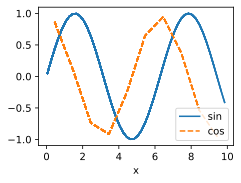

In [51]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

In [52]:
# module is the base class of all models, we need __init__ which stores learnable parameters, training_step which which accepts a data batch to return the loss value, and configure_optimizers to return the optimization method
# there is also validation_step to report evaluation measures

class Module(nn.Module, d2l.HyperParameters):
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net') # neural network is defined
        return self.net(X)

    def plot(self, key, value, train):
        # plot a point in animation
        assert hasattr(self, 'trainer') # trainer is not initiated
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

In [53]:
# the base class for data, __init__ used to prepare data, train_dataloader returns the data loader for the training dataset (a data loader is a generator that yields a data batch each time it is used), training) which is fed into training_step of module to compute the loss. val_data loader returns the validation dataset loader

class DataModule(d2l.HyperParameters):
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

In [54]:
# this class trains the learnable parameters in the Module class with data specified in DataModule. The key method is `fit` which accepts an instance of Module and an instance of DataModule, using these it iterates over the entire dataset `max_epochs` times to train the model.

class Trainer(d2l.HyperParameters):
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader) if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError


### 3.4 Linear Regression Implementation from Scratch

In [55]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [56]:
# before we optize our model, we need to set some parameters, so we initilize weights by drawing random numbers from a normal distribution mean 0 SD 0.01 (0.01 works very well in practice)

class LinearRegressionScratch(d2l.Module):
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [57]:
# next we define our model, relating the inputs and parameters to its output, by taking the matrix vector product of the input X and weights w, add the offset b to each. this foward method is added to LinearRegressionScratch

@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

In [58]:
# next up is the loss function, where we calculate the squared loss

@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [59]:
# while not needed for linear regression, here is a minibatch SDG, which randomly draws from our dataset, we estimate the gradient of the loss and then update the parameters in the direction which will reduce loss
# This code applies the update at a learning rate lr

class SGD(d2l.HyperParameters):
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self): # sets all gradietns to 0, must be done before backpropogation
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [60]:
# this returns an instance of the SGD class, added to LinearRegressionScratch
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

In [61]:
# finally we need the main training loop. In each epoch we iterate through the entire training dataset, passing once through every example, in every iteration we grab a minibatch of training examples and compute its loss, then we compute gradients with respect and call the optimization algorithm

@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

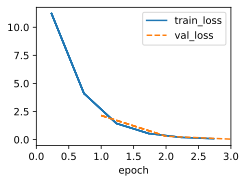

In [62]:
# we are using SyntheticRegressionData class and pass in some ground truth parameters, then train our model with lr=0.03, max_epochs=3

model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [63]:
# because we made the dataset ourselves we know what the true parameters are, so we can evaluate our success by comparing the true parameters to those that we leared through the trainign loop
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.0946, -0.1430])
error in estimating b: tensor([0.2305])


### 4.1 Softmax Regression

We are now focusing on classification problems, where we split data into catagories. We often use one hot encoding to split into categories
This time we need seperate weights for each category, and use these to correspond to the outputs where o = Wx + b.
However if we tried to do this linearly, while effective for some problems, if we compared bedrooms to possibility of buying a house, a mansion would be above 1, so we use an exponential function instead alongside a normalization function, this is known as the softmax function. To improve computational efficiency we vectorise these calculations in minibatches of data.

The loss function, or cross entropy loss function, is calculated using the derrivative between the probability (softmax) and what actually happened. This works just as well for vectors as it does one-hot

### 4.2 The Image Classification Dataset

In [64]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [65]:
class FashionMNIST(d2l.DataModule):
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [66]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val) #60000 training images, 10000 testing images

(60000, 10000)

In [67]:
data.train[0][0].shape #grayscale and 32x32

torch.Size([1, 32, 32])

In [68]:
@d2l.add_to_class(FashionMNIST) # converts numeric labels to names
def text_labels(self, indices):
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

In [69]:
@d2l.add_to_class(FashionMNIST)  # minibatch data iterator
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train, num_workers=self.num_workers)

In [70]:
X, y = next(iter(data.train_dataloader())) # load a minibatch of 64 images
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [71]:
tic = time.time() # very slow
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'6.29 sec'

In [72]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    raise NotImplementedError

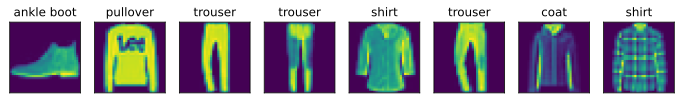

In [73]:
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

### 4.3 The Base Classification Model

In [74]:
import torch
from d2l import torch as d2l

In [75]:
class Classifier(d2l.Module): # reports both loss value and classification accuracy
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [76]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

In [77]:
@d2l.add_to_class(Classifier) # computs accuracy based on y_hat, using argmax to obtain the predicted class by index, compared to the ground truth y.
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

### 4.4 Softmax Regression Implementation from Scratch

In [78]:
import torch
from d2l import torch as d2l

In [79]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

We are mapping from scalars to probabilities. Given a matrix X we can sum over all elements, or only ones on the same axis.
Computing the softmax requires: the expenentiation of each term, sum over each row for normalization, division of each row by normalization constant

In [80]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

In [81]:
# we turn each element into a nonnegative number, each row sums to 1.
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1417, 0.2408, 0.1674, 0.2921, 0.1581],
         [0.2461, 0.1309, 0.2542, 0.1604, 0.2084]]),
 tensor([1.0000, 1.0000]))

In [82]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [83]:
# we flatten each 28x28 image into vectors of lenth 784.
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [84]:
# defines how the network maps each input to an output
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

In [85]:
# we now want to start implementing the cross-entropy loss function
# we create a sample data y_hat with 2 predicted probabilities over 3 classes
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [86]:
# cross entropy loss function by averaging over logarithms of selected probabilities
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [87]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

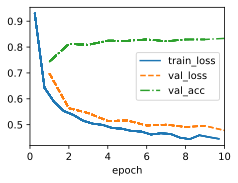

In [88]:
# now we get to training the model
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [89]:
# classify images
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

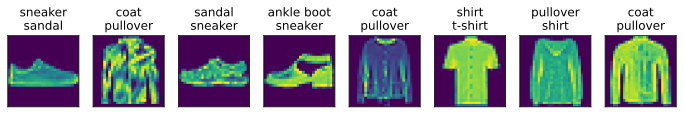

In [90]:
# show images we label incorrectly
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

### 5.1 Multilayer Perceptrons
We can't rely on linear models, as data is often affected by data around it, we get around this by using deep nural networks, to learn a representation via hidden layers.
This process of stacking hidden complete layers on top of each other is known as a multilayer perceptron (or MLP)

We need activation functions, as otherwise the MLP just performs affine transformations, thus we must use nonlinear activation functions (like relu). Activation functions apply elementwise, meaning each hidden unit can be calculated independently.

In [91]:
%matplotlib inline
import torch
from d2l import torch as d2l

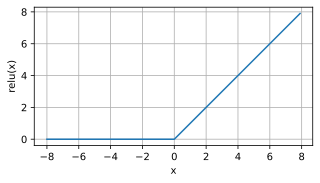

In [92]:
# relu activation function
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

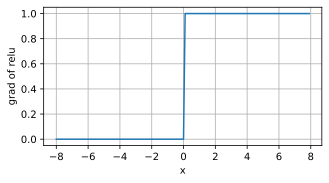

In [93]:
# derrivative of relu, derrivative is well behaved
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

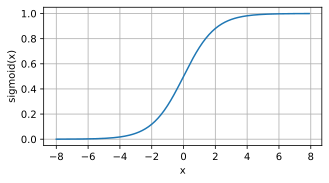

In [94]:
# sigmoid function
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

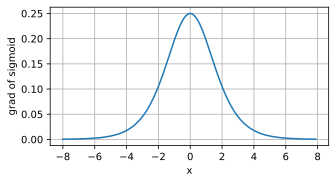

In [95]:
# derrivative of sigmoid
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

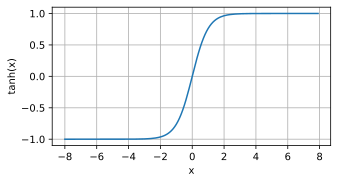

In [96]:
#tanh function
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

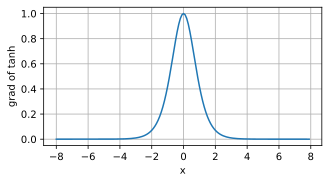

In [97]:
# derrivative of tanh
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### 5.2  Implementation of Multilayer Perceptrons

In [98]:
# now we have coded our activation functions, we can start looking at implementing our MLPs
import torch
from torch import nn
from d2l import torch as d2l

In [99]:
# we represent our parameters with serverak tensors, and for each layer we must keep track of one weight matrix and one bias vector
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

In [100]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

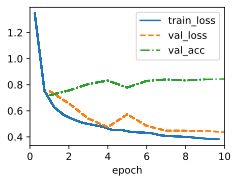

In [101]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

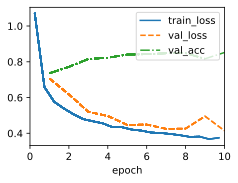

In [102]:
# this time we add two fully connected layers, compared to the pervious one. first is hidden, 2nd is output
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens), nn.ReLU(), nn.LazyLinear(num_outputs))

# training loop is the same as for softmax
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

### 5.3 Forward Propagation, Backward Propagation, and Computational Graphs

Now that we have a simple neural network, we can start looking at backwards propogation. Previously we had been relying on automatic differentiation, but we need to understand what is going on under the hood.

Forward propgation refers to the calculation and storage of intermediate variables for a neural network.
Back propagation refers to the method of calculating neural network patterns. The method traverses the netwrok in reverse order, from the output to the input layer, according to the chain rule, storing any intermediate variables.

Forward and backwards propagation depend on each other, in particular for all forward propagation, we traverse the computational graph, computing variables, then these are used for backpropagation, when order is reversed.
We alternate forward and back propagation, updating model parameters using gradients given by backpropagation, though this does require retaining intermediate values until backpropagation is complete.